# Predict the Automobile Insurance claim

For Downoading the DataSet(https://github.com/shubh2002/DataSets)

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [336]:
df=pd.read_csv('Auto Insurance  Claims amount.csv')

In [337]:
df.shape

(9134, 26)

In [338]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [339]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [340]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [341]:
df['Country'].value_counts()

US    9134
Name: Country, dtype: int64

In [342]:
df['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [343]:
df['State'].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

In [344]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [345]:
"""droping unwanted columns"""
df=df.drop(['Customer','Country','State Code','Location Code',
            'Effective To Date','State'],axis=1)

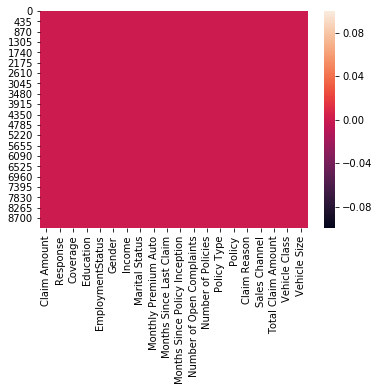

In [346]:
sns.heatmap(df.isnull())

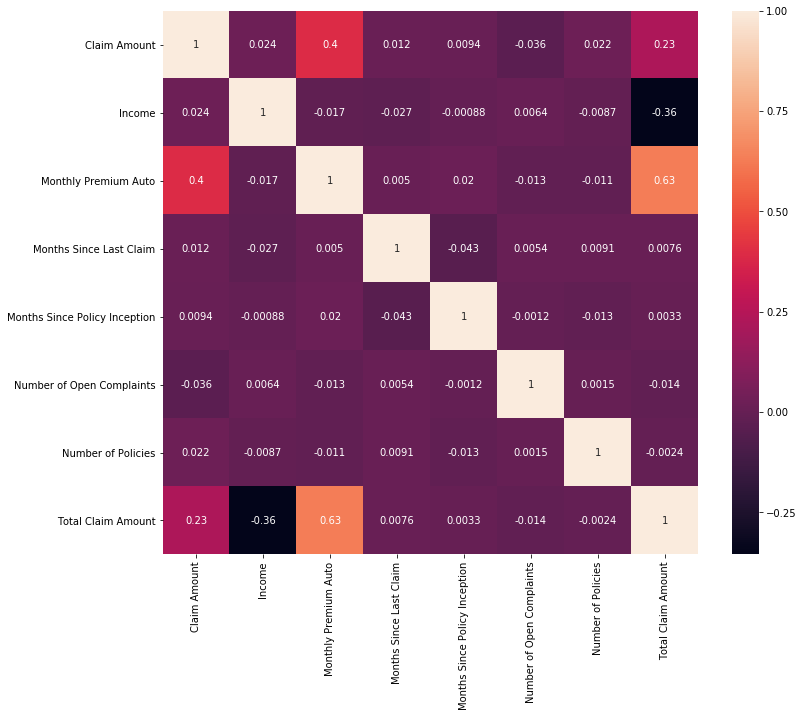

In [347]:
corr_heatmap=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_heatmap,annot=True)

In [348]:
obj_columns=df.columns[df.dtypes=='object']
obj_columns

Index(['Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [349]:
for i in obj_columns:
    print(df[i].value_counts())

No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
F    4658
M    4476
Name: Gender, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
Collision       3752
Hail            2926
Scratch/Dent    1432
Other           1024
Name: Claim

In [350]:
df['Vehicle Size']=df['Vehicle Size'].map({'Small':1,'Medsize':2,'Large':3})
df['Coverage']=df['Coverage'].map({'Basic':1,'Extended':2,'Premium':3})
df['Education']=df['Education'].map({'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5})


In [351]:
df=pd.get_dummies(df,drop_first=True)

In [352]:
df.shape

(9134, 40)

In [353]:
df.columns

Index(['Claim Amount', 'Coverage', 'Education', 'Income',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'Vehicle Size',
       'Response_Yes', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_M', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2',
       'Policy_Special L3', 'Claim Reason_Hail', 'Claim Reason_Other',
       'Claim Reason_Scratch/Dent', 'Sales Channel_Branch',
       'Sales Channel_Call Center', 'Sales Channel_Web',
       'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV',
       'Vehicle Class_SUV', 'Vehicle

In [354]:
x=df.iloc[:,df.columns!='Total Claim Amount']
x.shape

(9134, 39)

In [355]:
y=df.iloc[:,df.columns=='Total Claim Amount'].values
y.shape

(9134, 1)

In [356]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x_scaled=scaling.fit_transform(x)

In [357]:
from sklearn.decomposition import PCA
pca=PCA(n_components=26)
x_scaled_pca=pca.fit_transform(x_scaled)

In [358]:
x_test,x_train,y_test,y_train=train_test_split(x_scaled,y,test_size=.20,random_state=0)

In [359]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',MSE)

Mean Squared Error : 36772.70600474659


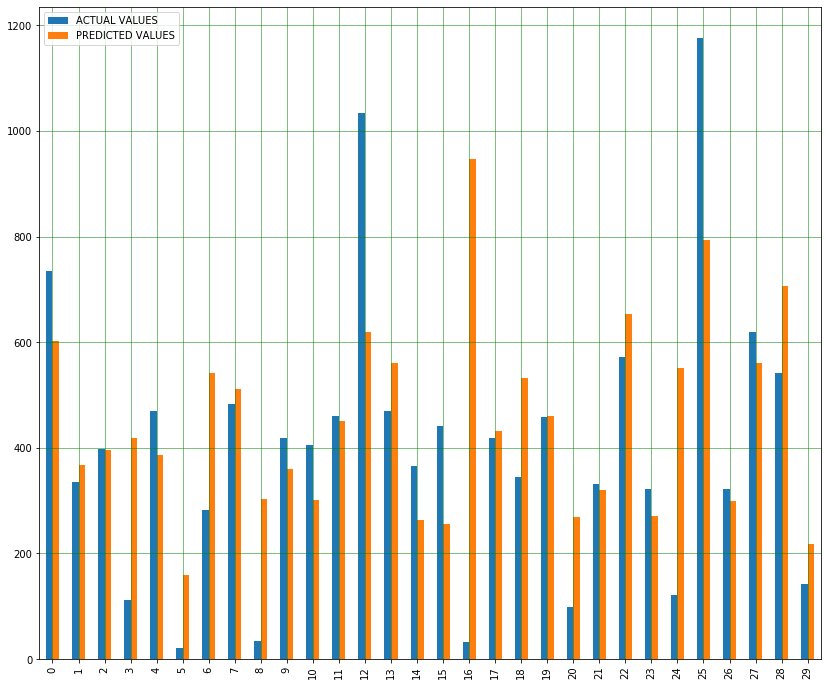

In [360]:
df2=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df2=df2.head(30)
df2.plot(kind='bar',figsize=(14,12))
plt.grid(linewidth='0.5',which='major',color='green',linestyle='-')
plt.show()

In [361]:
from xgboost import XGBRegressor
model2=XGBRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',MSE)

[20:22:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error : 33022.978765285596


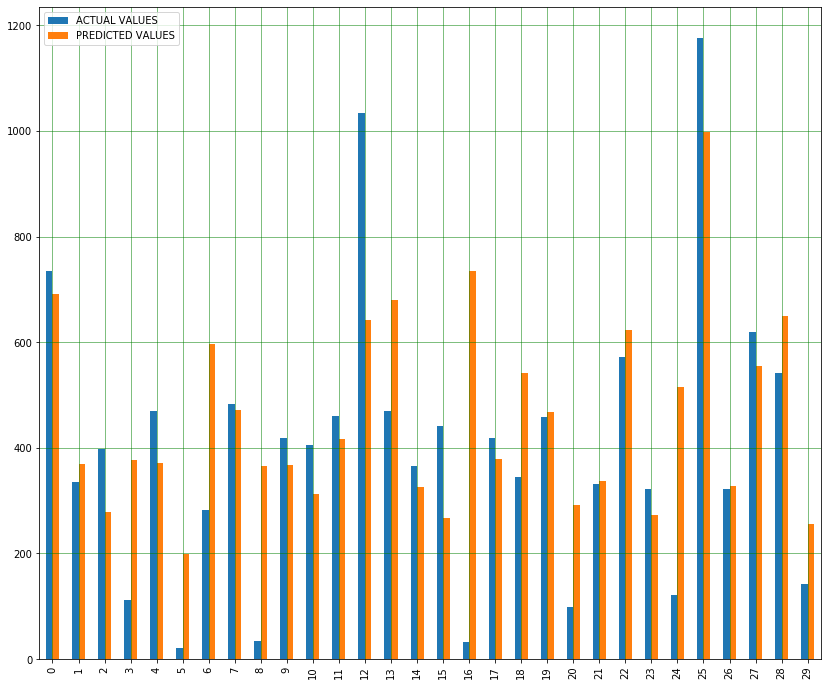

In [362]:
df3=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df3=df3.head(30)
df3.plot(kind='bar',figsize=(14,12))
plt.grid(linewidth='0.5',which='major',color='green',linestyle='-')
plt.show()

In [363]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=500)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
MSE=mean_squared_error(y_test,y_pred)
print('Mean Squared Error :',MSE)
print('ROOT MEAN SQUARED VALUE :',np.sqrt(MSE))

C:\Users\SHUBHAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean Squared Error : 32911.58881497793
ROOT MEAN SQUARED VALUE : 181.4155142620882


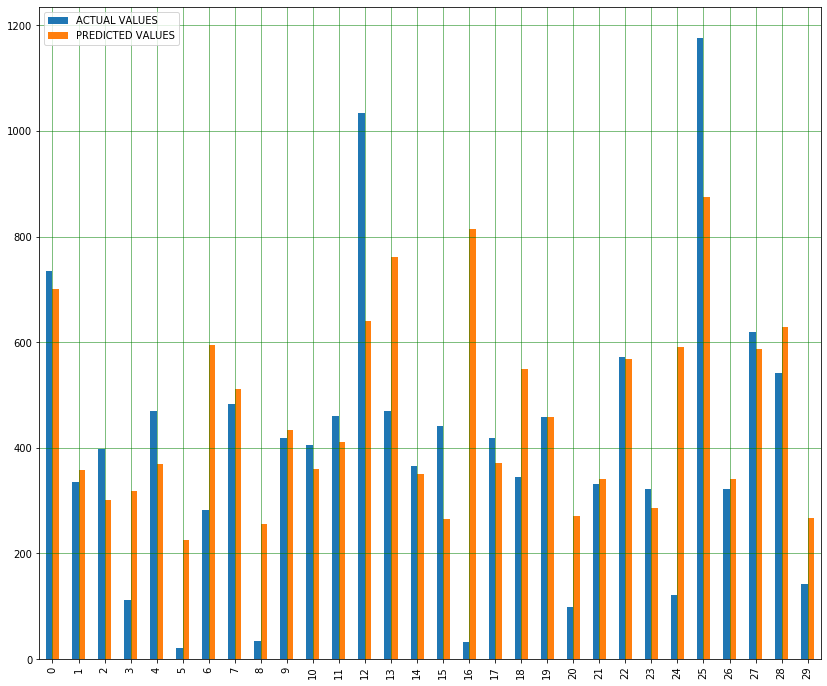

In [364]:
df4=pd.DataFrame({'ACTUAL VALUES':y_test.flatten(),'PREDICTED VALUES':y_pred.flatten()})
df4=df4.head(30)
df4.plot(kind='bar',figsize=(14,12))
plt.grid(linewidth='0.5',which='major',color='green',linestyle='-')
plt.show()

In [365]:
"""Serialization"""
import joblib
filename='practice project 18.sav'
joblib.dump(model3,filename)

['practice project 18.sav']